### 데이터 전처리

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
class0_data = pd.read_csv('./datasets/datasets/만료및탈퇴회원.csv', index_col=0)
class1_data = pd.read_csv('./datasets/datasets/정회원.csv', index_col=0)

In [3]:
## 11월에 탈퇴한 회원의 10월 데이터 - 탈퇴회원 데이터
exit_user = class0_data[class0_data['mm'] == 11]['userid'].unique()
exit_data = class1_data[(class1_data['userid'].isin(exit_user)) & (class1_data['mm'] == 10)]

exit_data['target'] = 'WILL EXIT'

exit_data

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm,target
3678,00132af0-87d8-4b7e-bbbf-4d67a1accc2b,F,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-,11,-",15,0,0,...,39.0,64.36,220.0,143.0,2.0,5.0,4.0,2021,10,WILL EXIT
3693,01123b39-b626-4d80-a399-8d424c11b4a0,M,초등,초5,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-,11",15,0,0,...,14.0,76.00,97.0,75.0,NaN,NaN,NaN,2021,10,WILL EXIT
3717,02300eca-940f-4971-a898-5fb83d3b07ea,F,초등,초1,11,학습생(정),"-,11,-,11,-,11,-,11,-,11",24,0,0,...,9.0,74.89,51.0,37.0,NaN,NaN,NaN,2021,10,WILL EXIT
3719,0248e2ee-9ecb-48f8-9658-67fd41d99b24,M,초등,초3,11,학습생(정),"-,11,-,11,-,11,-,11,-,11,-,11,-",19,0,0,...,36.0,43.22,196.0,92.0,NaN,NaN,NaN,2021,10,WILL EXIT
3742,03411e28-b8e4-419d-aae0-b9809ed60402,M,초등,초5,11,학습생(정),"-,11,-,11,-",29,0,0,...,8.0,75.38,49.0,37.0,NaN,NaN,NaN,2021,10,WILL EXIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,1225f6fc-204b-469e-a9c2-2c5f7f360747,F,초등,초2,11,학습생(정),11,0,0,0,...,28.0,84.18,105.0,97.0,NaN,NaN,NaN,2022,10,WILL EXIT
97042,124dbcb9-76ca-4d47-ae35-e53fff3cc1ff,M,초등,초5,11,학습생(정),"55,11",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,10,WILL EXIT
97204,1aafd5a8-b056-4361-8649-fb4820797965,M,초등,초3,11,학습생(정),11,0,0,0,...,48.0,62.58,247.0,143.0,3.0,11.0,8.0,2022,10,WILL EXIT
97285,1dc2e28a-b2c4-462b-83cb-98fdddfabf21,M,초등,초6,11,학습생(정),11,0,0,0,...,2.0,20.00,10.0,2.0,NaN,NaN,NaN,2022,10,WILL EXIT


In [4]:
## 11월에 정회원인 회원의 10월 데이터 - 정회원 데이터
regular_user = class1_data[class1_data['mm'] == 11]['userid'].unique()
regular_data = class1_data[(class1_data['userid'].isin(regular_user)) & (class1_data['mm'] == 10)]

regular_data['target'] = 'WILL STAY'

regular_data

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm,target
26901,000213f1-0f58-48d6-bcb3-3c15864b7d5a,M,초등,초4,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-,11,-,11",20,0,0,...,19.0,46.89,99.0,33.0,1.0,15.0,13.0,2021,10,WILL STAY
26902,0006cc87-557b-4ee7-8604-8b3afa86a31c,F,초등,초2,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",11,0,0,...,28.0,79.57,170.0,132.0,7.0,7.0,7.0,2021,10,WILL STAY
26903,001ef835-25e0-4f2a-9aa8-4aa2bad7a3dc,M,초등,초4,11,학습생(정),"-,11,-,11,-,11,-,11,-,11,-,11,-",22,0,0,...,17.0,66.35,104.0,74.0,NaN,NaN,NaN,2021,10,WILL STAY
26904,001f9510-f994-4516-b77d-d8a1bf181289,F,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-",7,0,0,...,71.0,90.35,446.0,393.0,21.0,26.0,26.0,2021,10,WILL STAY
26905,00203c3e-dd28-450d-b2d6-b6959dc81d04,M,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",14,0,0,...,35.0,77.09,243.0,191.0,3.0,9.0,9.0,2021,10,WILL STAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58117,ffba3c0f-5af8-4fa5-9b3b-2c2e432dedc3,F,초등,초2,11,학습생(정),"11,-,11,-,11,-,11,-,11,-",11,0,0,...,26.0,72.19,152.0,106.0,NaN,NaN,NaN,2021,10,WILL STAY
58118,ffc0b882-6280-44c5-b11e-1147e1bf6e0f,F,초등,초3,11,학습생(정),"-,11,-,11,-,11,-,11,-",25,0,0,...,16.0,74.00,120.0,93.0,6.0,6.0,6.0,2021,10,WILL STAY
58119,ffc0cb97-b4e9-4a19-8f07-e5c5870a6f5a,M,초등,초1,11,학습생(정),"-,11,-,11,-,11,-,11,-,11",9,0,0,...,46.0,79.85,270.0,216.0,NaN,NaN,NaN,2021,10,WILL STAY
58120,ffcae717-8d1e-4055-be25-24a907f7397c,M,초등,초6,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",7,0,0,...,13.0,81.08,80.0,67.0,NaN,NaN,NaN,2021,10,WILL STAY


In [5]:
dataset = pd.concat([exit_data, regular_data])

In [6]:
dataset['target'].value_counts()

WILL STAY    4128
WILL EXIT    1251
Name: target, dtype: int64

In [7]:
dataset = dataset.dropna(subset = ['point_gain_activeday_count', 'point_gain_count', 'point_gain',
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count',
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ])

In [8]:
X = dataset[['point_gain_activeday_count', 'point_gain_count', 'point_gain',
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count',
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ]]

In [9]:
Y = dataset['target']

In [10]:
Y.value_counts()

WILL STAY    2694
WILL EXIT     586
Name: target, dtype: int64

In [11]:
# 이탈-0, 유지-1  
Y = Y.apply(lambda x: 0 if x=='WILL EXIT' else 1)

In [12]:
Y.value_counts()

1    2694
0     586
Name: target, dtype: int64

### 데이터 불균형 해결 (SMOTE 적용)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2 , random_state= 156)

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (2624, 38) (2624,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (4292, 38) (4292,)
SMOTE 적용 전 레이블 값 분포: 
 1    2146
0     478
Name: target, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 1    2146
0    2146
Name: target, dtype: int64


### 모델 적용

결정트리, 보팅, 배깅, 랜덤포레스트, 그래디언트 부스팅 모델을 사용해보고,

각 모델의 **정확도**, **재현율**, **정밀도**, **AUC**, **Confusion matrix**를 출력해 보세요.

In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix

### Decision Tree(결정 트리)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [58]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

In [59]:
# DecisionTreeClassifer 학습.
dt_clf.fit(X_train_over , y_train_over)

DecisionTreeClassifier(random_state=156)

In [60]:
import sklearn.metrics as mt

pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print("Decision Tree 정확도: {:.4f}".format(accuracy))
print('Decision Tree Recall: {0:.4f}'.format(recall))
print('Decision Tree Precision: {0:.4f}'.format(precision))
print('Decision Tree AUC: {0:.4f}'.format(auc))
print('Decision Tree Confusion Matrix:','\n', matrix)

Decision Tree 정확도: 0.6280
Decision Tree Recall: 0.6989
Decision Tree Precision: 0.8290
Decision Tree AUC: 0.4837
Decision Tree Confusion Matrix: 
 [[ 29  79]
 [165 383]]


### ROC 그래프

fpr=array([0.        , 0.        , 0.00925926, 0.00925926, 0.01851852,
       0.01851852, 0.02777778, 0.02777778, 0.03703704, 0.03703704,
       0.0462963 , 0.0462963 , 0.05555556, 0.05555556, 0.06481481,
       0.06481481, 0.07407407, 0.07407407, 0.08333333, 0.08333333,
       0.09259259, 0.09259259, 0.10185185, 0.10185185, 0.11111111,
       0.11111111, 0.12037037, 0.12037037, 0.12962963, 0.12962963,
       0.13888889, 0.13888889, 0.14814815, 0.14814815, 0.15740741,
       0.15740741, 0.16666667, 0.16666667, 0.17592593, 0.17592593,
       0.18518519, 0.18518519, 0.19444444, 0.19444444, 0.2037037 ,
       0.2037037 , 0.21296296, 0.21296296, 0.22222222, 0.22222222,
       0.23148148, 0.23148148, 0.24074074, 0.24074074, 0.25      ,
       0.25      , 0.25925926, 0.25925926, 0.26851852, 0.26851852,
       0.27777778, 0.27777778, 0.28703704, 0.28703704, 0.30555556,
       0.30555556, 0.31481481, 0.31481481, 0.32407407, 0.32407407,
       0.33333333, 0.33333333, 0.35185185, 0.35185185, 0.3

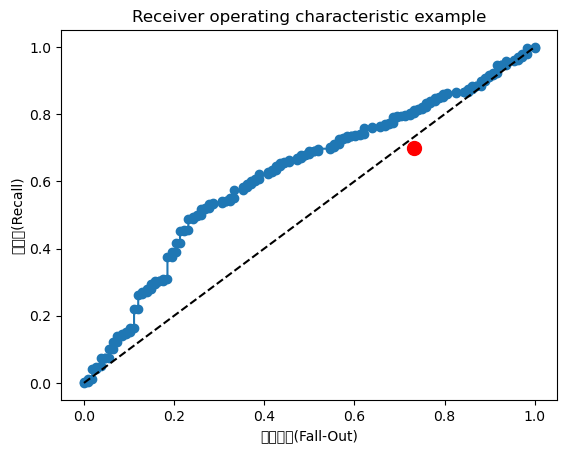

In [61]:
[[tn,fp],[fn,tp]]=matrix
tp,fp, fn,tn

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])
print(f'{fpr=},\n{tpr=},\n{thresholds=}')
fallout=fp/(fp+tn)
recall=tp/(tp+fn)
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

### Voting(보팅)

In [62]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [63]:
# 개별 모델은 KNN와 DecisionTree 임.
knn_clf = KNeighborsClassifier(n_neighbors=8)
dt_clf = DecisionTreeClassifier(random_state=42)

In [64]:
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('KNN',knn_clf),('DT',dt_clf)] , voting='soft' )

In [65]:
# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train_over , y_train_over)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=8)),
                             ('DT', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [66]:
pred = vo_clf.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))
print('Voting 분류기 Recall: {0:.4f}'.format(recall))
print('Voting 분류기 Precision: {0:.4f}'.format(precision))
print('Voting 분류기 AUC: {0:.4f}'.format(auc))
print('Voting 분류기 Confusion Matrix:','\n', matrix)

Voting 분류기 정확도: 0.6326
Voting 분류기 Recall: 0.7007
Voting 분류기 Precision: 0.8330
Voting 분류기 AUC: 0.4939
Voting 분류기 Confusion Matrix: 
 [[ 31  77]
 [164 384]]


### ROC 그래프

fpr=array([0.        , 0.        , 0.00925926, 0.00925926, 0.01851852,
       0.01851852, 0.02777778, 0.02777778, 0.03703704, 0.03703704,
       0.0462963 , 0.0462963 , 0.05555556, 0.05555556, 0.06481481,
       0.06481481, 0.07407407, 0.07407407, 0.08333333, 0.08333333,
       0.09259259, 0.09259259, 0.10185185, 0.10185185, 0.11111111,
       0.11111111, 0.12037037, 0.12037037, 0.12962963, 0.12962963,
       0.13888889, 0.13888889, 0.14814815, 0.14814815, 0.15740741,
       0.15740741, 0.16666667, 0.16666667, 0.17592593, 0.17592593,
       0.18518519, 0.18518519, 0.19444444, 0.19444444, 0.2037037 ,
       0.2037037 , 0.21296296, 0.21296296, 0.22222222, 0.22222222,
       0.23148148, 0.23148148, 0.24074074, 0.24074074, 0.25      ,
       0.25      , 0.25925926, 0.25925926, 0.26851852, 0.26851852,
       0.27777778, 0.27777778, 0.28703704, 0.28703704, 0.30555556,
       0.30555556, 0.31481481, 0.31481481, 0.32407407, 0.32407407,
       0.33333333, 0.33333333, 0.35185185, 0.35185185, 0.3

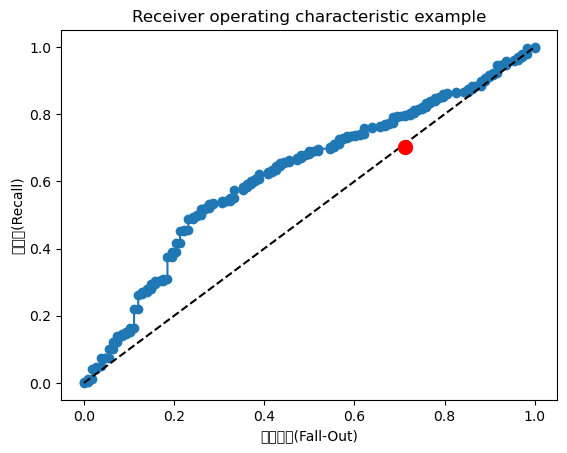

In [68]:
[[tn,fp],[fn,tp]]=matrix
tp,fp, fn,tn

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])
print(f'{fpr=},\n{tpr=},\n{thresholds=}')
fallout=fp/(fp+tn)
recall=tp/(tp+fn)
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

#### Bagging(배깅)

In [69]:
from sklearn.ensemble import BaggingClassifier
lr_clf = LogisticRegression(solver='liblinear')

bagging_clf = BaggingClassifier(base_estimator=lr_clf)

# BaggingClassifier 학습/예측.
bagging_clf.fit(X_train_over , y_train_over)
pred = bagging_clf.predict(X_test)

In [70]:
# 평가
accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('Bagging 분류기 정확도: {0:.4f}'.format(accuracy))
print('Bagging 분류기 Recall: {0:.4f}'.format(recall))
print('Bagging 분류기 Precision: {0:.4f}'.format(precision))
print('Bagging 분류기 AUC: {0:.4f}'.format(auc))
print('Bagging 분류기 Confusion Matrix:','\n', matrix)

Bagging 분류기 정확도: 0.6387
Bagging 분류기 Recall: 0.6369
Bagging 분류기 Precision: 0.9018
Bagging 분류기 AUC: 0.6425
Bagging 분류기 Confusion Matrix: 
 [[ 70  38]
 [199 349]]


### ROC 그래프

fpr=array([0.        , 0.        , 0.00925926, 0.00925926, 0.01851852,
       0.01851852, 0.02777778, 0.02777778, 0.03703704, 0.03703704,
       0.0462963 , 0.0462963 , 0.05555556, 0.05555556, 0.06481481,
       0.06481481, 0.07407407, 0.07407407, 0.08333333, 0.08333333,
       0.09259259, 0.09259259, 0.10185185, 0.10185185, 0.11111111,
       0.11111111, 0.12037037, 0.12037037, 0.12962963, 0.12962963,
       0.13888889, 0.13888889, 0.14814815, 0.14814815, 0.15740741,
       0.15740741, 0.16666667, 0.16666667, 0.17592593, 0.17592593,
       0.18518519, 0.18518519, 0.19444444, 0.19444444, 0.2037037 ,
       0.2037037 , 0.21296296, 0.21296296, 0.22222222, 0.22222222,
       0.23148148, 0.23148148, 0.24074074, 0.24074074, 0.25      ,
       0.25      , 0.25925926, 0.25925926, 0.26851852, 0.26851852,
       0.27777778, 0.27777778, 0.28703704, 0.28703704, 0.30555556,
       0.30555556, 0.31481481, 0.31481481, 0.32407407, 0.32407407,
       0.33333333, 0.33333333, 0.35185185, 0.35185185, 0.3

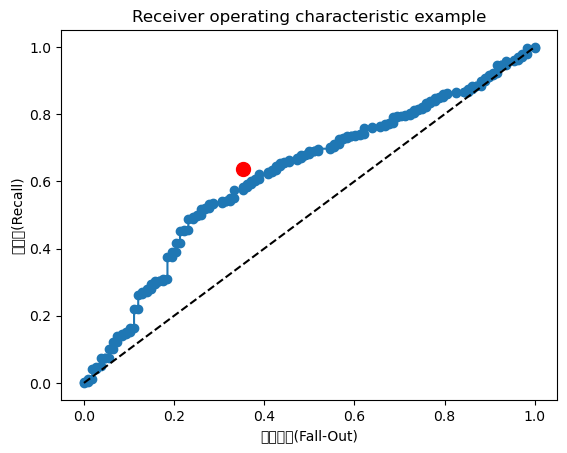

In [71]:
[[tn,fp],[fn,tp]]=matrix
tp,fp, fn,tn

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])
print(f'{fpr=},\n{tpr=},\n{thresholds=}')
fallout=fp/(fp+tn)
recall=tp/(tp+fn)
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

#### 랜덤 포레스트

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train_over , y_train_over)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))
print('랜덤 포레스트 Recall: {0:.4f}'.format(recall))
print('랜덤 포레스트 Precision: {0:.4f}'.format(precision))
print('랜덤 포레스트 AUC: {0:.4f}'.format(auc))
print('랜덤 포레스트 Confusion Matrix:','\n', matrix)

랜덤 포레스트 정확도: 0.6951
랜덤 포레스트 Recall: 0.7682
랜덤 포레스트 Precision: 0.8522
랜덤 포레스트 AUC: 0.5462
랜덤 포레스트 Confusion Matrix: 
 [[ 35  73]
 [127 421]]


In [73]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_over.columns)
ftr_importances.sort_values(ascending=False)[:20]

study_notcompleted_count       0.068163
point_gain                     0.061821
media_activeday_count          0.059566
point_gain_activeday_count     0.058157
tablet_login_count             0.054719
study_activeday_count          0.053917
point_loss_activeday_count     0.051055
test_activeday_count           0.045189
point_gain_count               0.043533
point_loss_count               0.036867
test_average_score             0.032706
tablet_activeday_count         0.030707
tablet_logout_count            0.030419
test_correct_count             0.029209
point_loss                     0.026351
total_system_learning_time     0.021374
video_speed_count              0.018179
total_caliper_learning_time    0.017379
tablet_resume_count            0.016934
tablet_moved_menu_count        0.016102
dtype: float64

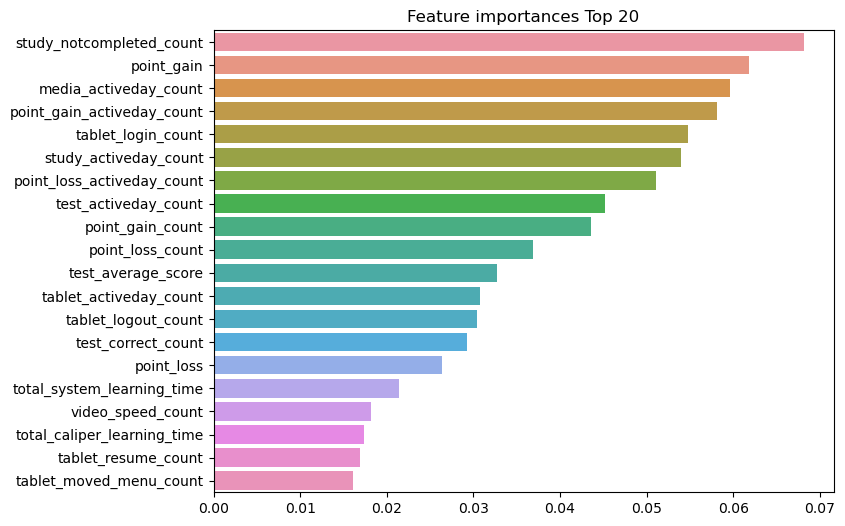

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_over.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### ROC 그래프

fpr=array([0.        , 0.        , 0.00925926, 0.00925926, 0.01851852,
       0.01851852, 0.02777778, 0.02777778, 0.03703704, 0.03703704,
       0.0462963 , 0.0462963 , 0.05555556, 0.05555556, 0.06481481,
       0.06481481, 0.07407407, 0.07407407, 0.08333333, 0.08333333,
       0.09259259, 0.09259259, 0.10185185, 0.10185185, 0.11111111,
       0.11111111, 0.12037037, 0.12037037, 0.12962963, 0.12962963,
       0.13888889, 0.13888889, 0.14814815, 0.14814815, 0.15740741,
       0.15740741, 0.16666667, 0.16666667, 0.17592593, 0.17592593,
       0.18518519, 0.18518519, 0.19444444, 0.19444444, 0.2037037 ,
       0.2037037 , 0.21296296, 0.21296296, 0.22222222, 0.22222222,
       0.23148148, 0.23148148, 0.24074074, 0.24074074, 0.25      ,
       0.25      , 0.25925926, 0.25925926, 0.26851852, 0.26851852,
       0.27777778, 0.27777778, 0.28703704, 0.28703704, 0.30555556,
       0.30555556, 0.31481481, 0.31481481, 0.32407407, 0.32407407,
       0.33333333, 0.33333333, 0.35185185, 0.35185185, 0.3

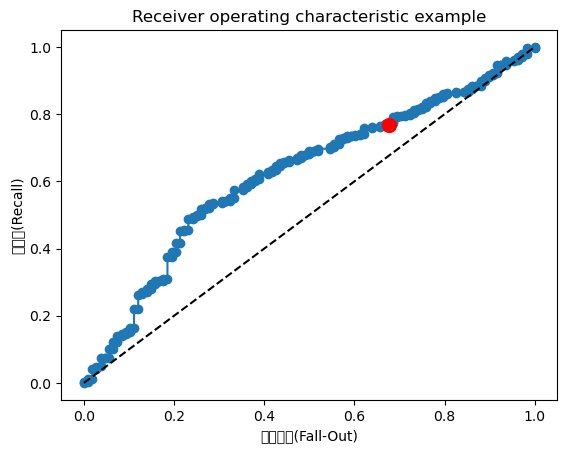

In [75]:
[[tn,fp],[fn,tp]]=matrix
tp,fp, fn,tn

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])
print(f'{fpr=},\n{tpr=},\n{thresholds=}')
fallout=fp/(fp+tn)
recall=tp/(tp+fn)
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

#### 그래디언트 부스팅

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train_over , y_train_over)
gb_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test , gb_pred)
recall = recall_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred)
auc = roc_auc_score(y_test, gb_pred)
matrix = confusion_matrix(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(accuracy))
print('GBM Recall: {0:.4f}'.format(recall))
print('GBM Precision: {0:.4f}'.format(precision))
print('GBM AUC: {0:.4f}'.format(auc))
print('GBM Confusion Matrix:','\n', matrix)

print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.7485
GBM Recall: 0.8558
GBM Precision: 0.8450
GBM AUC: 0.5298
GBM Confusion Matrix: 
 [[ 22  86]
 [ 79 469]]
GBM 수행 시간: 4.3 초 


In [52]:
[[tn,fp],[fn,tp]]=matrix
tp,fp, fn,tn

(469, 86, 79, 22)

### ROC 그래프

fpr=array([0.        , 0.        , 0.00925926, 0.00925926, 0.01851852,
       0.01851852, 0.02777778, 0.02777778, 0.03703704, 0.03703704,
       0.0462963 , 0.0462963 , 0.05555556, 0.05555556, 0.06481481,
       0.06481481, 0.07407407, 0.07407407, 0.08333333, 0.08333333,
       0.09259259, 0.09259259, 0.10185185, 0.10185185, 0.11111111,
       0.11111111, 0.12037037, 0.12037037, 0.12962963, 0.12962963,
       0.13888889, 0.13888889, 0.14814815, 0.14814815, 0.15740741,
       0.15740741, 0.16666667, 0.16666667, 0.17592593, 0.17592593,
       0.18518519, 0.18518519, 0.19444444, 0.19444444, 0.2037037 ,
       0.2037037 , 0.21296296, 0.21296296, 0.22222222, 0.22222222,
       0.23148148, 0.23148148, 0.24074074, 0.24074074, 0.25      ,
       0.25      , 0.25925926, 0.25925926, 0.26851852, 0.26851852,
       0.27777778, 0.27777778, 0.28703704, 0.28703704, 0.30555556,
       0.30555556, 0.31481481, 0.31481481, 0.32407407, 0.32407407,
       0.33333333, 0.33333333, 0.35185185, 0.35185185, 0.3

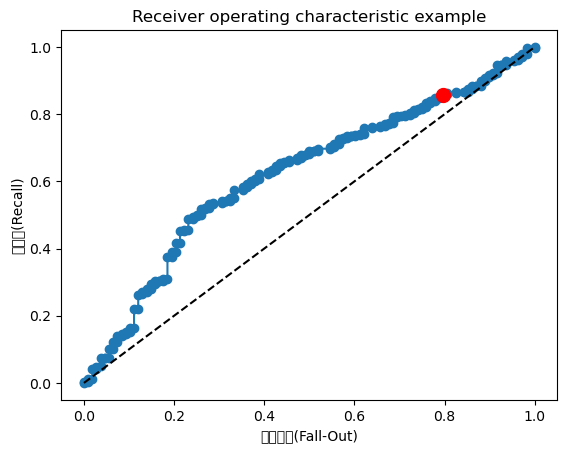

In [53]:
[[tn,fp],[fn,tp]]=matrix
tp,fp, fn,tn

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])
print(f'{fpr=},\n{tpr=},\n{thresholds=}')
fallout=fp/(fp+tn)
recall=tp/(tp+fn)
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()